In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Profile
using ProfileSVG
using Plots; gr();

  Activating project at `~/Coding/julia/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


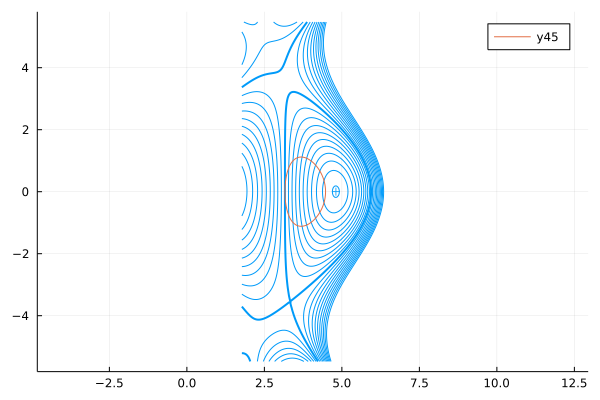

LoadError: Did not find build.layer: name=nothing type=1 identifier=nothing fs=nothing

In [11]:
#par = FUSE.Parameters(:ITER,init_from=:ods)
#par = FUSE.Parameters(:ITER,init_from=:scalars)
#par = FUSE.Parameters(:D3D)
#par = FUSE.Parameters(:FPP; init_from=:ods)
par = FUSE.Parameters(:FPP; init_from=:gasc)
#par = FUSE.Parameters(:CAT)
#par = FUSE.Parameters(:HDB5; tokamak=:D3D, case=1)
#display(par)

dd=IMAS.dd()
FUSE.init(dd, par; do_plot=true);

 * Status: success

 * Candidate solution
    Final objective value:     5.835529e-03

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-06

 * Work counters
    Seconds run:   11  (vs limit 60)
    Iterations:    157
    f(x) calls:    288


dd.build.oh.max_j = 4.864319168627999e7
dd.build.oh.critical_j = 6.808057089970501e7
dd.build.tf.max_j = 2.281616062866371e7
dd.build.tf.critical_j = 3.1936553007535808e7
maximum(dd.solid_mechanics.center_stack.stress.vonmises.oh) = 6.588212886533718e8
stainless_steel.yield_strength = 8.0e8
maximum(dd.solid_mechanics.center_stack.stress.vonmises.tf) = 6.049787834068894e8
stainless_steel.yield_strength = 8.0e8


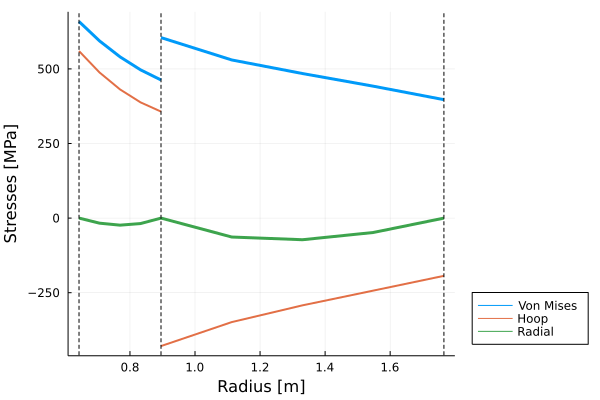

In [14]:
FUSE.OHTFsizingActor(dd,par;verbose=true);
FUSE.CXbuildActor(dd,par)
plot(dd.solid_mechanics.center_stack.stress)

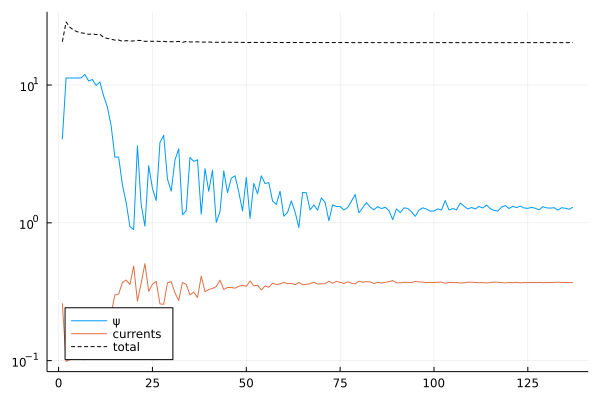

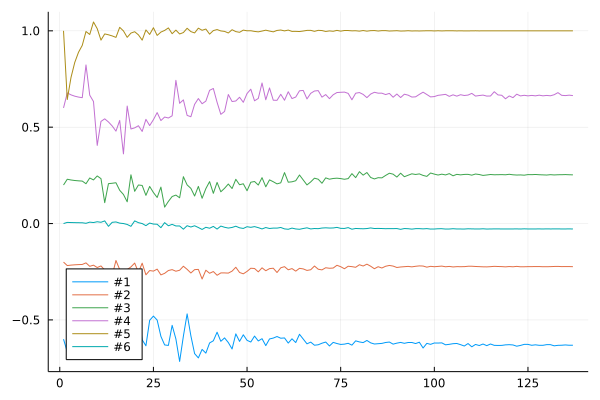

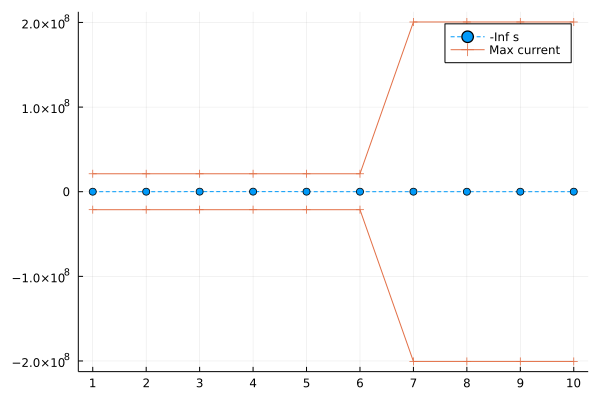

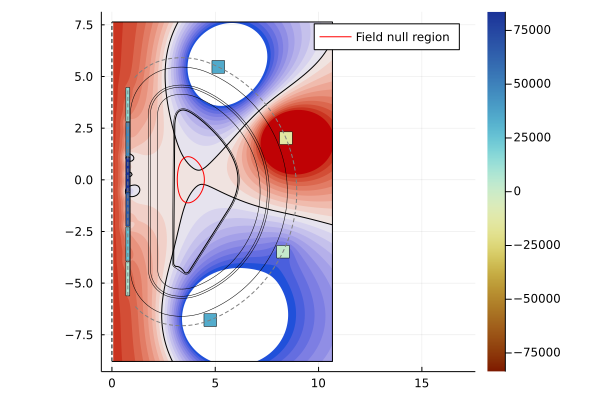

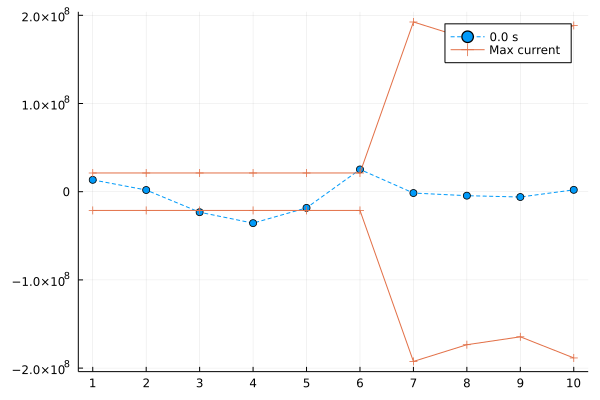

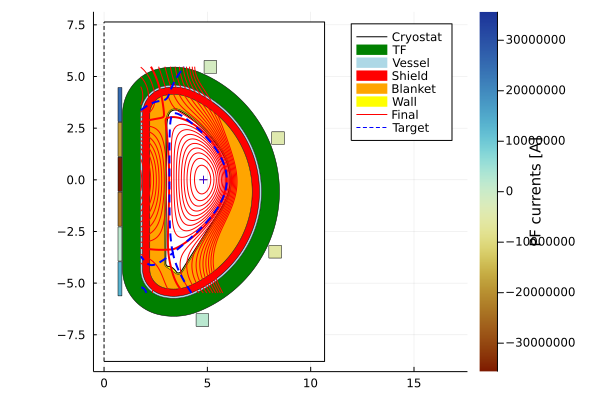

 56.172853 seconds (405.82 M allocations: 16.860 GiB, 9.69% gc time, 49.50% compilation time)


In [15]:
FUSE.init_pf_active(dd,par)
@time FUSE.PFcoilsOptActor(dd, par, λ_currents=0.5; do_plot=true)#, update_eq_in=true);

┌ Warning: Skipped marker arg cicle.
└ @ Plots /Users/meneghini/.julia/packages/Plots/8K4be/src/args.jl:1230


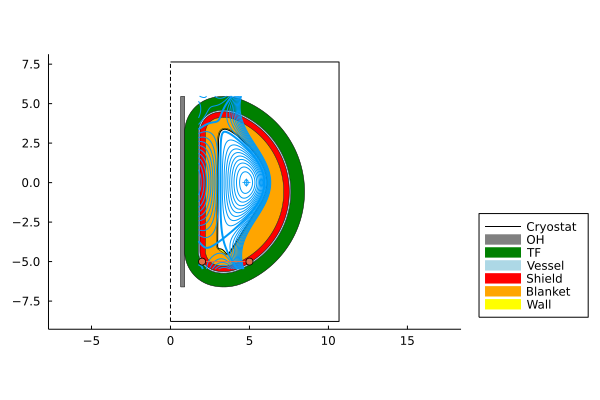

In [16]:
#empty!(dd.wall)
#FUSE.CXbuildActor(dd,par)
plot(dd.build)
plot!(dd.equilibrium)
plot!([2,5], [-5,-5], marker=:cicle, label="")

"39.716 KeV ==> cost 2.62e+01"

"62.742 KeV ==> cost 5.13e+02"

"25.484 KeV ==> cost 4.70e+01"

"48.511 KeV ==> cost 1.42e+02"

"34.280 KeV ==> cost 1.12e+01"

"30.920 KeV ==> cost 2.80e+01"

"36.356 KeV ==> cost 1.33e+00"

"37.639 KeV ==> cost 1.00e+01"

"35.563 KeV ==> cost 3.69e+00"

"36.846 KeV ==> cost 4.56e+00"

"36.053 KeV ==> cost 6.23e-01"

"36.053 KeV ==> cost 6.23e-01"

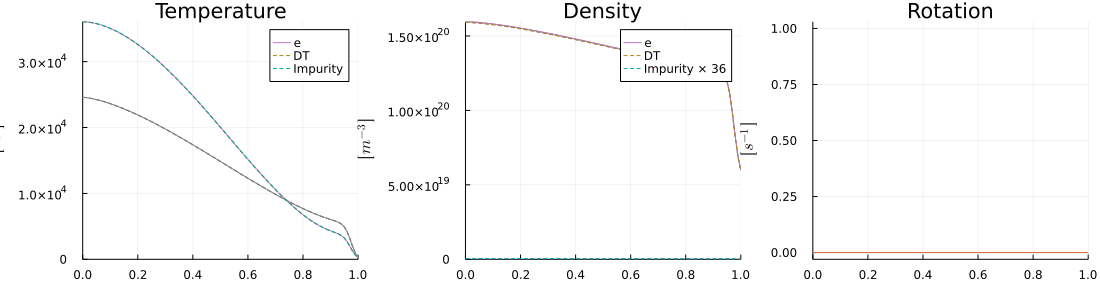

Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [2457.896656, 100000.000000]
 * Minimizer: 3.605321e+04
 * Minimum: 6.225150e-01
 * Iterations: 10
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+2.2e-16): true
 * Objective Function Calls: 11
method = Optim.GoldenSection()
initial_lower = 2457.896656117179
initial_upper = 100000.0
minimizer = 36053.20523315778
minimum = 0.622514957778904
iterations = 10
iteration_converged = false
converged = true
rel_tol = 0.01
abs_tol = 2.220446049250313e-16
f_calls = 11


In [18]:
#par = FUSE.Parameters(:FPP; init_from=:gasc)
# empty!(dd.summary)
empty!(dd.core_profiles)
FUSE.init_core_profiles(dd, par)
# empty!(dd.core_sources)
# FUSE.init_core_sources(dd, par)
# FUSE.init_missing(dd, par)
#display(plot(dd.core_sources))

# display(plot(dd.core_profiles))
# FUSE.AD_TAUENN.lump_ions_as_bulk_and_impurity!(dd.core_profiles.profiles_1d[].ion)
# display(plot(dd.core_profiles))
plot(dd.core_profiles,label="",color=:gray)
FUSE.TauennActor(dd,par;do_plot=true,rho_fluxmatch = 0.3, transport_model = :tglfnn, error = 1E-2, T_shaping=1.8, eped_factor=1.0, verbose=true);

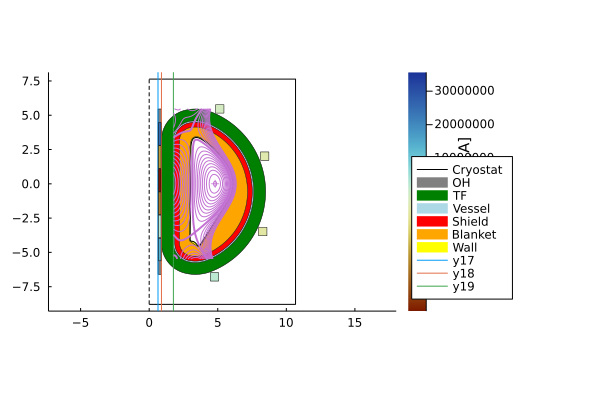

In [19]:
plot(dd.build)
vline!([dd.build.layer[1].end_radius])
vline!([dd.build.layer[2].end_radius])
vline!([dd.build.layer[3].end_radius])
plot!(dd.equilibrium.time_slice[])
display(plot!(dd.pf_active))

In [ ]:
entries = Set(String[])
#for k in sort(collect(setdiff(IMAS.access_log.read,IMAS.access_log.write)))
for k in sort(collect(union(IMAS.access_log.write,IMAS.access_log.read)))
    for key in keys(IMAS.info(k))
        push!(entries,key)
    end
    if endswith(k,r"[_\.]time")
        continue
    end
    units = get(IMAS.info(k),"units","-")
    description = get(IMAS.info(replace(k,".value"=>"")),"documentation","")
    println("$k [$units]")
    println("  $description")
    println()
end
entries